# Customer Personality Analysis

Business Objective  :
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Target
Need to perform clustering to summarize customer segments.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [5]:
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign1 (1).xlsx to marketing_campaign1 (1) (1).xlsx


In [7]:
cust_data = pd.read_excel('marketing_campaign1 (1).xlsx')

In [8]:
cust_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
cust_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
cust_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can observe income feature has 24 null records.

In [12]:
cust_data.duplicated().sum()

0

We can see duplicate records not found

In [13]:
cust_data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Data Preparation & Cleaning

In [14]:
#Creating customer age feature from birth year of cutomer
cust_data['CustomerAge'] = 2023 - cust_data['Year_Birth']
cust_data['CustomerAge']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: CustomerAge, Length: 2240, dtype: int64

In [15]:
cust_data['Dt_Customer'].dt.year.min()

2012

In [16]:
cust_data['Dt_Customer'].dt.year.max()

2014

In [17]:
# creating senior customer feature from date of customer joined
cust_data['Sr_Customer'] = 2023 - cust_data['Dt_Customer'].dt.year
cust_data['Sr_Customer'].value_counts()

10    1189
9      557
11     494
Name: Sr_Customer, dtype: int64

In [18]:
#Creating Children feature from combining kidhome and Teenhome features
cust_data['Children']=cust_data['Kidhome']+cust_data['Teenhome']
cust_data['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64

In [19]:
# Creating Totalaccepted Cmp feature from combining accetedcmp features
cust_data['TotalAcceptedCmp']=cust_data['AcceptedCmp3']+cust_data['AcceptedCmp2']+cust_data['AcceptedCmp1']
+cust_data['AcceptedCmp4']+cust_data['AcceptedCmp5']+cust_data['Response']
cust_data['TotalAcceptedCmp']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    0
2238    0
2239    0
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

In [20]:
#Creating MntTotalProducts fetaure to know the amount spent on all products by combing all products
cust_data['MntTotalProducts']=cust_data['MntWines']+cust_data['MntFruits']+cust_data['MntMeatProducts']
+cust_data['MntFishProducts']+cust_data['MntSweetProducts']+cust_data['MntGoldProds']
cust_data['MntTotalProducts']

0       1269
1         18
2        602
3         35
4        334
        ... 
2235     934
2236     436
2237    1173
2238     672
2239     148
Name: MntTotalProducts, Length: 2240, dtype: int64

In [21]:
#Craeting NumTotalPurchases feature to know the total purchases by combining all types of purchases features
cust_data['NumTotalPurchases']=cust_data['NumDealsPurchases']+cust_data['NumWebPurchases']+cust_data['NumCatalogPurchases']
+cust_data['NumStorePurchases']
cust_data['NumTotalPurchases']

0       21
1        4
2       11
3        4
4       13
        ..
2235    14
2236    17
2237     6
2238    13
2239     7
Name: NumTotalPurchases, Length: 2240, dtype: int64

In [22]:
#Creating Income grp feature to segregate customers based on income range
cust_data['Income_Grp'] = np.where(cust_data.Income <= 50000, 'Low', 'High')

In [23]:
cust_data['Income_Grp'].value_counts()

High    1180
Low     1060
Name: Income_Grp, dtype: int64

In [24]:
#Creating CustomeAgegrp feature to segregate customers based on customers age
cust_data['CustomerAgeGrp'] = np.where(
    cust_data['CustomerAge'] <= 45 , 'Adult', np.where(
    (cust_data['CustomerAge'] > 45) & (cust_data['CustomerAge'] <= 60) , 'MiddleAge', 'SrCitizen'))

In [25]:
cust_data['CustomerAgeGrp'].value_counts()

MiddleAge    987
SrCitizen    699
Adult        554
Name: CustomerAgeGrp, dtype: int64

In [26]:
cust_data.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [27]:
cust_data.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [28]:
#We can observe that there is no variance for Z_CostContact and Z_Revenue features, so we can drop these features.

In [29]:
cust_data=cust_data.drop(['Z_CostContact','Z_Revenue'], axis=1)
cust_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,1,66,11,0,0,1269,21,High,SrCitizen
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,69,9,2,0,18,4,Low,SrCitizen
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,58,10,0,0,602,11,High,MiddleAge
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,39,9,1,0,35,4,Low,Adult
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,42,9,1,0,334,13,High,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,56,10,1,0,934,14,High,MiddleAge
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,77,9,3,1,436,17,High,SrCitizen
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,42,9,0,0,1173,6,High,Adult
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,67,9,1,0,672,13,High,SrCitizen


In [30]:
cust_data[cust_data.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,40,10,1,0,16,2,High,Adult
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,37,10,1,0,9,27,High,Adult
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,64,10,0,0,142,5,High,SrCitizen
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,72,9,3,0,101,6,High,SrCitizen
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,41,10,1,0,36,4,High,Adult
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,0,50,11,1,0,71,6,High,MiddleAge
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,66,11,3,0,464,21,High,SrCitizen
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,66,9,2,0,15,2,High,SrCitizen
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,50,10,0,0,841,7,High,MiddleAge
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,0,62,10,1,0,379,10,High,SrCitizen


In [31]:
cust_data.dropna(axis=0, inplace = True)

In [32]:
cust_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
CustomerAge            0
Sr_Customer            0
Children               0
TotalAcceptedCmp       0
MntTotalProducts       0
NumTotalPurchases      0
Income_Grp             0
CustomerAgeGrp         0
dtype: int64

In [33]:
cust_data.shape

(2216, 35)

In [34]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

Text(0.5, 1.0, 'CustomerAge')

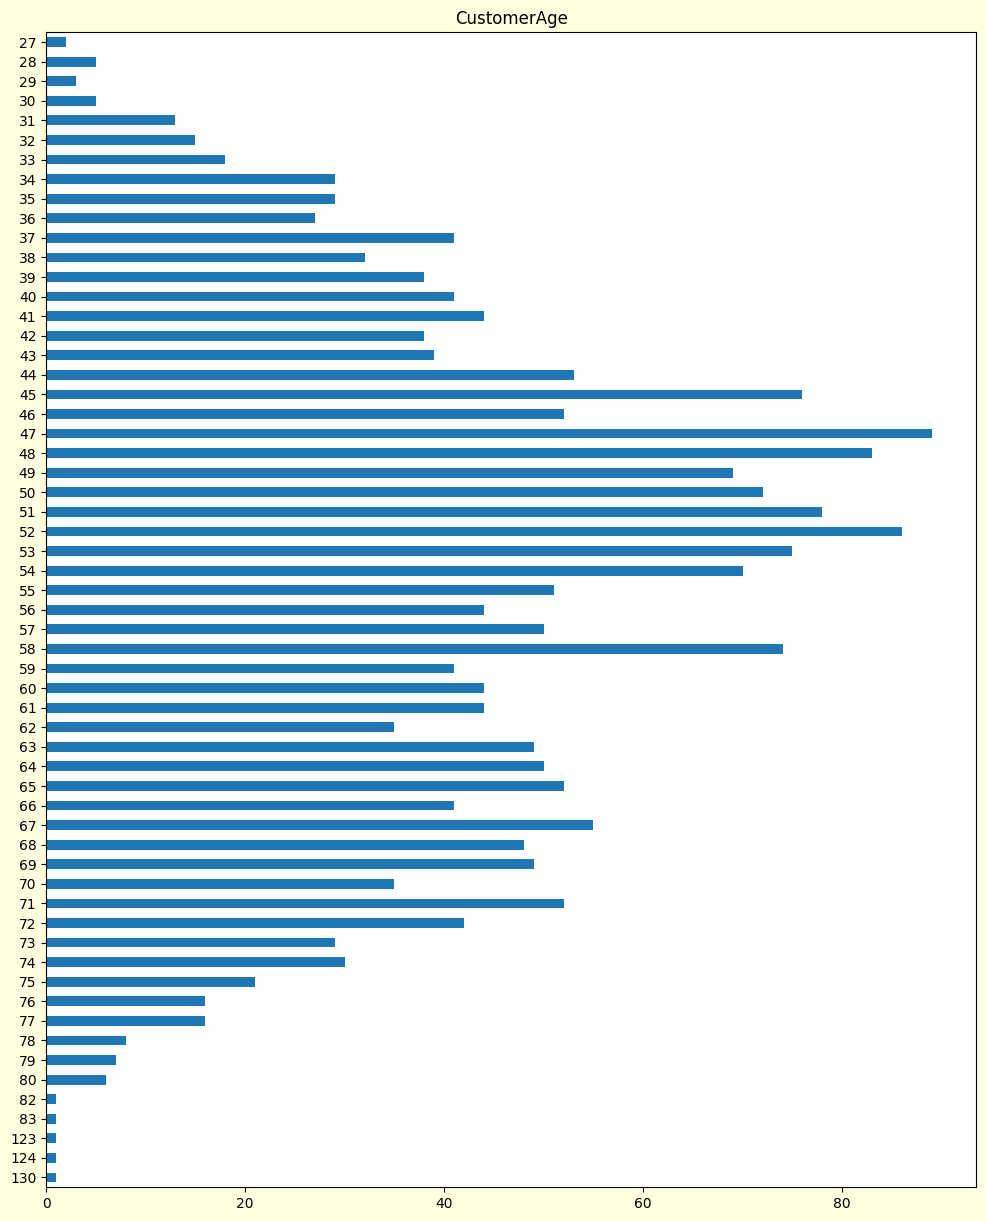

In [35]:
plt.figure(figsize=(12,15), facecolor='lightyellow')
cust_data['CustomerAge'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('CustomerAge')

We can observe in above plot customers age between 27 to 80 and vey few customers are above 120 age.

<Axes: >

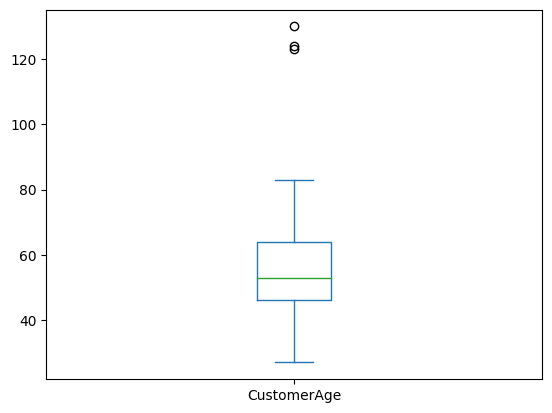

In [36]:
cust_data['CustomerAge'].plot(kind='box')

We can observe in above box plot, customer age greater than 120 can be considered as outliers and we can remove these outliers.

In [37]:
cust_data[cust_data['CustomerAge']>120]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,0,123,10,1,0,29,4,Low,SrCitizen
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,130,9,1,0,13,2,High,SrCitizen
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,124,10,0,0,1461,11,High,SrCitizen


In [38]:
# drop the above customers
cust_data.drop(labels=[192,239,339], inplace = True)

In [39]:
cust_data[cust_data['CustomerAge']>120]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp


In [40]:
cust_data.shape

(2213, 35)

<Axes: ylabel='Frequency'>

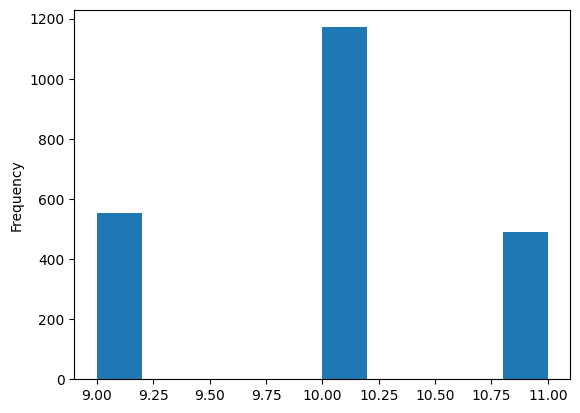

In [41]:
cust_data['Sr_Customer'].plot(kind='hist')

We can observe in above bar plot, half of the customers are staying with the company since 10 years.

In [42]:
cust_data['Education'].value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

<Axes: >

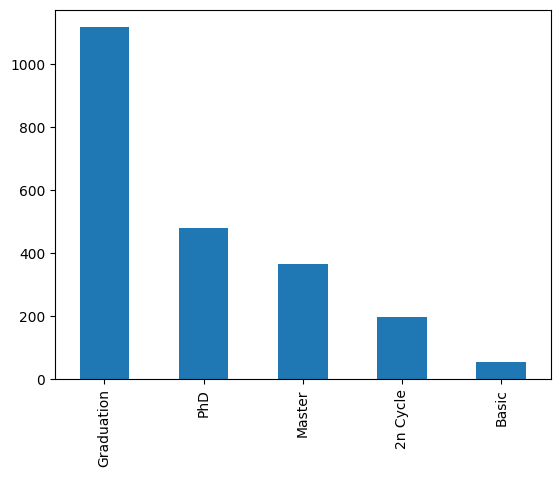

In [43]:
cust_data['Education'].value_counts().plot(kind='bar')

we can observe in above bar plot more customers having education graduation

In [44]:
# converting education data into 3 groups graduation, post graduation and under graduation

In [45]:
cust_data['Education'].replace(['PhD','Master'],'PostGraduation' , inplace=True)


In [46]:
cust_data['Education'].replace(['Basic','2n Cycle'],'UnderGraduation' , inplace=True)

In [47]:
cust_data['Education'].value_counts()

Graduation         1116
PostGraduation      845
UnderGraduation     252
Name: Education, dtype: int64

<Axes: ylabel='Frequency'>

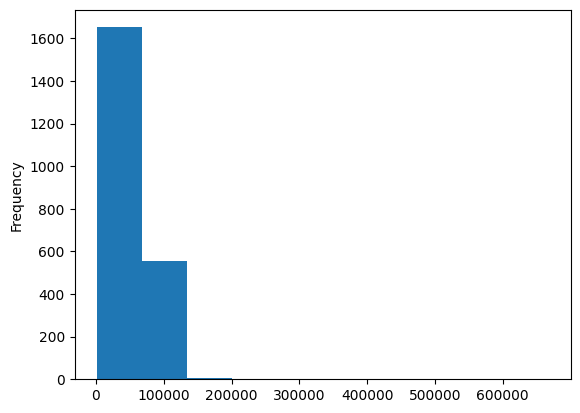

In [48]:
cust_data['Income'].plot(kind='hist')

<Axes: >

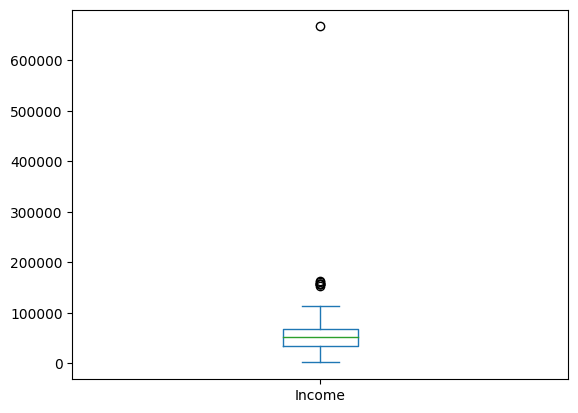

In [49]:
cust_data['Income'].plot(kind='box')

We can observe in above box plot one customer is having income more than 600000 can be considered as outlier.
so we can drop that customer.

In [50]:
cust_data[cust_data['Income']>150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
164,8475,1973,PostGraduation,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,50,9,1,0,1604,37,High,MiddleAge
617,1503,1976,PostGraduation,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,47,10,2,0,102,0,High,MiddleAge
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,48,9,0,0,3,0,High,MiddleAge
687,1501,1982,PostGraduation,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,41,11,0,0,1693,43,High,Adult
1300,5336,1971,PostGraduation,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,52,10,1,0,49,1,High,MiddleAge
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,46,10,0,0,1726,28,High,MiddleAge
2132,11181,1949,PostGraduation,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,74,10,0,0,5,0,High,SrCitizen
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,46,10,1,0,41,8,High,MiddleAge


In [51]:
cust_data.drop(labels=[164,617,655,687,1300,1653,2233,2132], inplace = True)

In [52]:
cust_data[cust_data['Income']>150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp


In [53]:
cust_data.shape

(2205, 35)

In [54]:
cust_data.Marital_Status.value_counts()

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<Axes: >

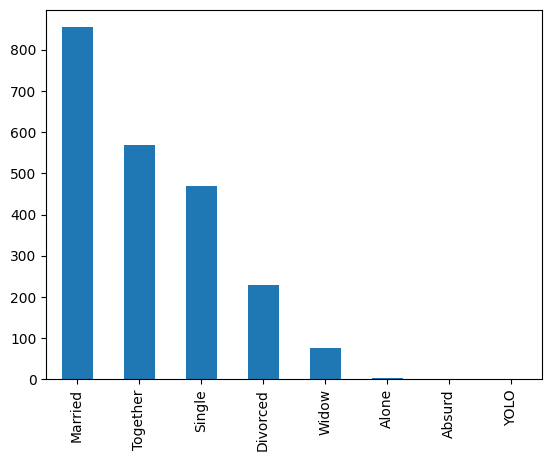

In [55]:
cust_data.Marital_Status.value_counts().plot(kind='bar')

We can see in above bar plot, more customers are married , together status and single, divorced and widow are less in number.
alone, absurd, yolo status customers are very minute.
so we can categorize this data into either married or single.

In [56]:
#converting Marital status data into 2 categories either married or single

In [57]:
cust_data['Marital_Status'].replace(['Married','Together'],'Married' , inplace=True)

In [58]:
cust_data['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single' , inplace=True)

In [59]:
cust_data.Marital_Status.value_counts()

Married    1422
Single      783
Name: Marital_Status, dtype: int64

In [60]:
cust_data.Kidhome.value_counts()

0    1276
1     883
2      46
Name: Kidhome, dtype: int64

<Axes: ylabel='Kidhome'>

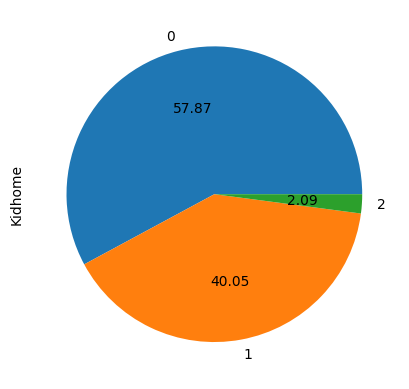

In [61]:
cust_data.Kidhome.value_counts().plot(kind='pie',autopct='%.2f')

In [62]:
cust_data.Teenhome.value_counts()

0    1139
1    1015
2      51
Name: Teenhome, dtype: int64

<Axes: ylabel='Teenhome'>

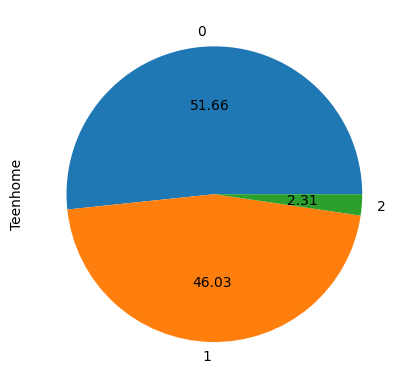

In [63]:
cust_data.Teenhome.value_counts().plot(kind='pie',autopct='%.2f')

In [64]:
cust_data.Children.value_counts()

1    1112
0     628
2     415
3      50
Name: Children, dtype: int64

<Axes: ylabel='Children'>

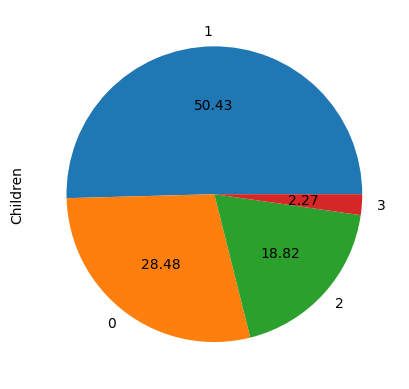

In [65]:
cust_data.Children.value_counts().plot(kind='pie',autopct='%.2f')

<Axes: >

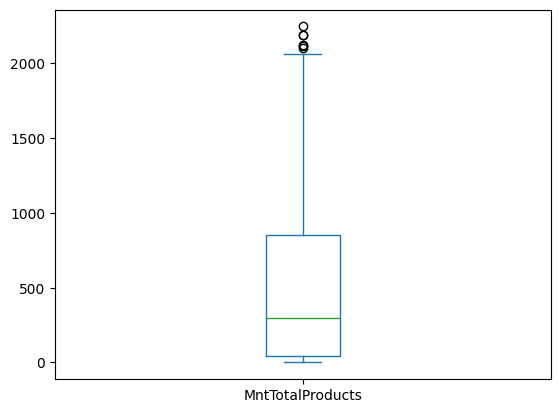

In [66]:
cust_data.MntTotalProducts.plot(kind='box')

<Axes: >

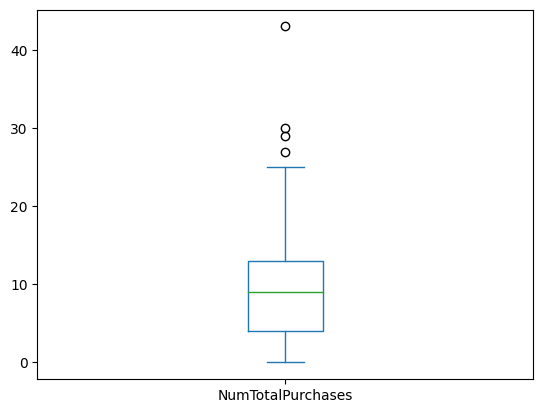

In [67]:
cust_data.NumTotalPurchases.plot(kind='box')

In [68]:
cust_data[cust_data.NumTotalPurchases>30]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,0,44,10,1,0,1727,43,Low,Adult


In [69]:
# drop the above customers
cust_data.drop(labels=21, inplace = True)

In [70]:
cust_data[cust_data.NumTotalPurchases>30]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp


In [71]:
cust_data.shape

(2204, 35)

<Axes: ylabel='Frequency'>

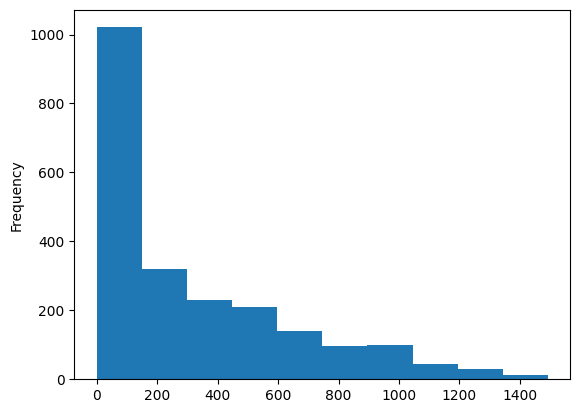

In [72]:
cust_data.MntWines.plot(kind='hist')

<Axes: >

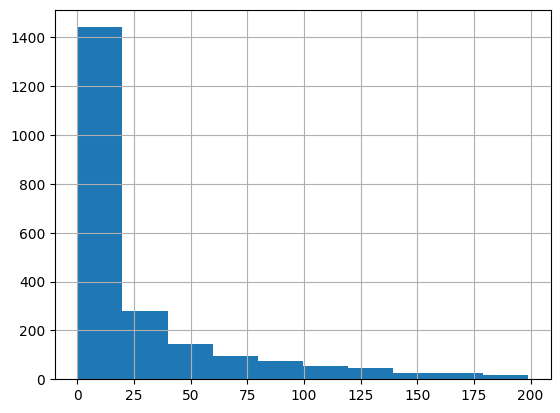

In [73]:
cust_data.MntFruits.hist()

<Axes: >

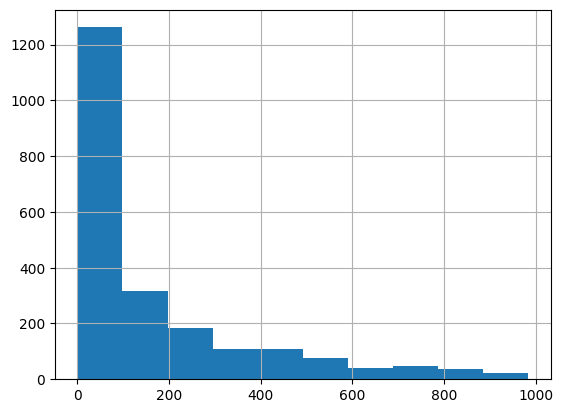

In [74]:
cust_data.MntMeatProducts.hist()

<Axes: >

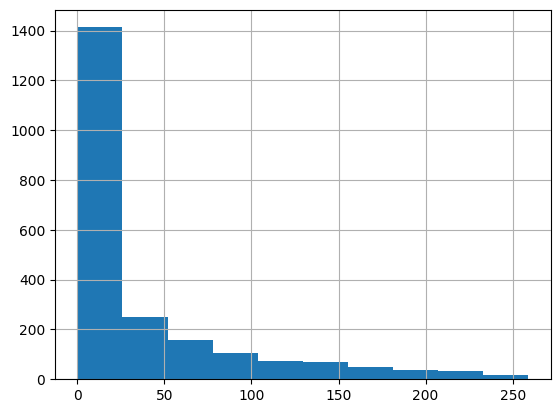

In [75]:
cust_data.MntFishProducts.hist()

<Axes: >

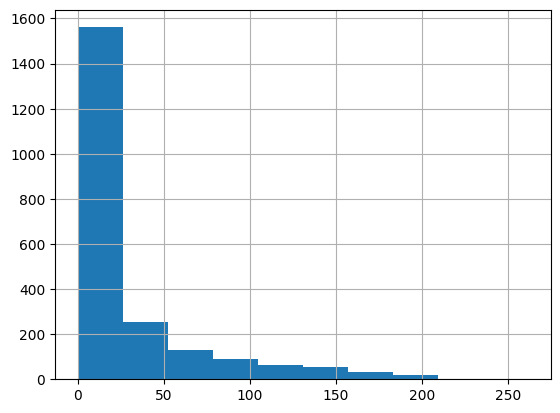

In [76]:
cust_data.MntSweetProducts.hist()

<Axes: >

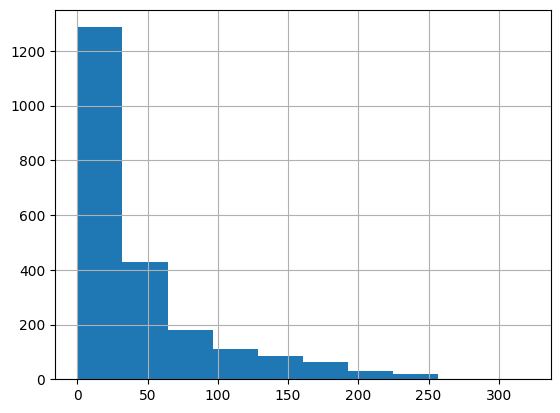

In [77]:
cust_data.MntGoldProds.hist()

We can observe in above histograms, amount spent on wine and meat products are very high than other products.

<Axes: ylabel='Frequency'>

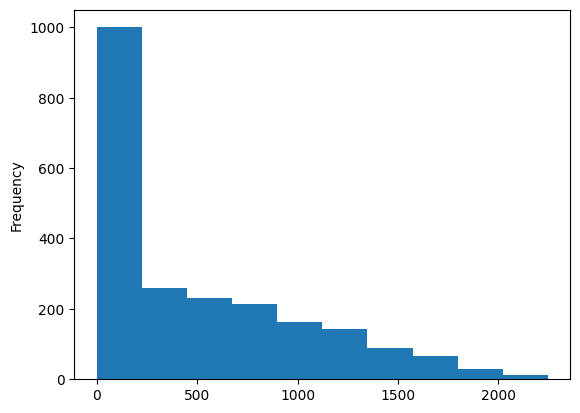

In [78]:
cust_data.MntTotalProducts.plot(kind='hist')

<Axes: >

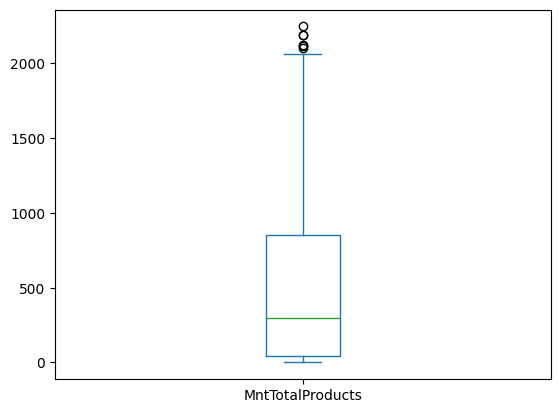

In [79]:
cust_data.MntTotalProducts.plot(kind='box')

<Axes: >

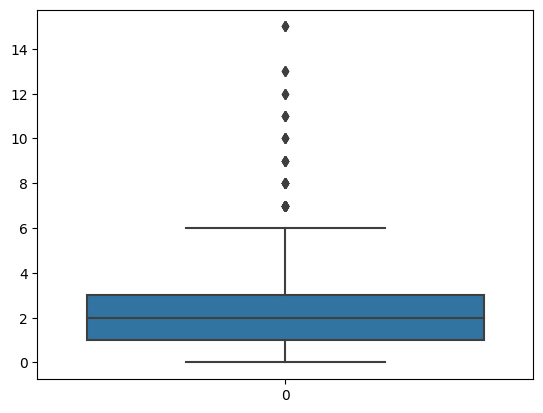

In [80]:
sns.boxplot(cust_data.NumDealsPurchases)

In [81]:
cust_data[cust_data.NumDealsPurchases>14]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
432,238,1967,UnderGraduation,Married,67309.0,1,1,2013-01-23,76,515,...,0,0,56,10,2,0,743,30,High,MiddleAge
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,...,0,0,32,11,0,0,157,16,Low,Adult
1245,6862,1971,Graduation,Single,1730.0,0,0,2014-05-18,65,1,...,0,0,52,9,0,0,5,15,Low,MiddleAge
1846,9931,1963,PostGraduation,Married,4023.0,1,1,2014-06-23,29,5,...,0,0,60,9,2,0,6,15,Low,MiddleAge


In [82]:
# drop the above customers
cust_data.drop(labels=[432,1042,1245,1846], inplace = True)

In [83]:
cust_data[cust_data.NumDealsPurchases>14]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp


<Axes: >

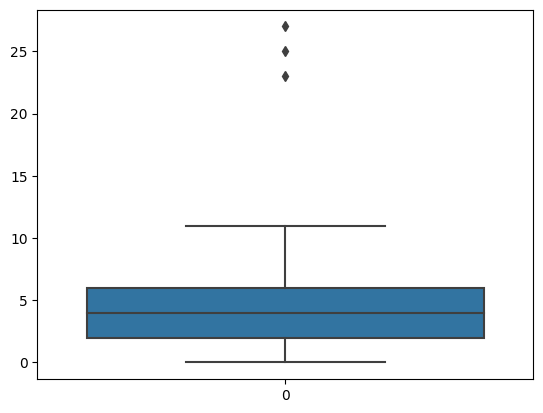

In [84]:
#cust_data.NumWebPurchases.plot(kind='kde')
sns.boxplot(cust_data.NumWebPurchases)

In [85]:
cust_data[cust_data.NumWebPurchases>20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
1806,6237,1966,PostGraduation,Single,7144.0,0,2,2013-12-07,92,81,...,0,0,57,10,2,0,118,24,Low,MiddleAge
1898,4619,1945,PostGraduation,Single,113734.0,0,0,2014-05-28,9,6,...,0,0,78,9,0,0,11,27,High,SrCitizen
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,0,54,10,1,0,32,25,Low,MiddleAge


In [86]:
# drop the above customers
cust_data.drop(labels=[1806,1898,1975], inplace = True)

In [87]:
cust_data[cust_data.NumWebPurchases>20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp


<Axes: >

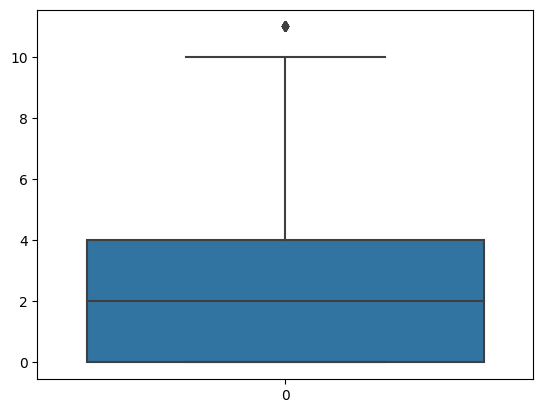

In [88]:
sns.boxplot(cust_data.NumCatalogPurchases)

<Axes: xlabel='NumStorePurchases', ylabel='Count'>

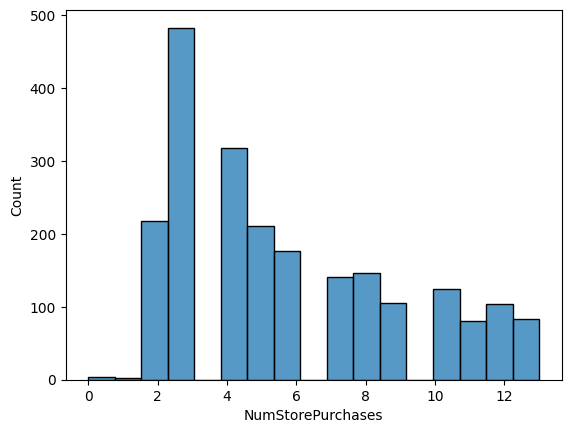

In [89]:
sns.histplot(cust_data.NumStorePurchases)

<Axes: >

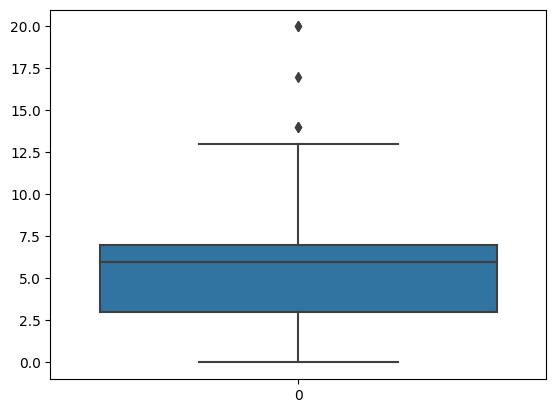

In [90]:
sns.boxplot(cust_data.NumWebVisitsMonth)

In [91]:
cust_data[cust_data.NumWebVisitsMonth>17]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp
9,5899,1950,PostGraduation,Married,5648.0,1,1,2014-03-13,68,28,...,0,0,73,9,2,1,34,2,Low,SrCitizen
774,4303,1957,PostGraduation,Married,6835.0,0,1,2012-12-08,76,107,...,0,0,66,11,1,0,121,0,Low,SrCitizen


In [92]:
# drop the above customers
cust_data.drop(labels=[9,774], inplace = True)

In [93]:
cust_data[cust_data.NumWebVisitsMonth>17]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,CustomerAge,Sr_Customer,Children,TotalAcceptedCmp,MntTotalProducts,NumTotalPurchases,Income_Grp,CustomerAgeGrp


In [94]:
cust_data.shape

(2195, 35)

<Axes: ylabel='AcceptedCmp1'>

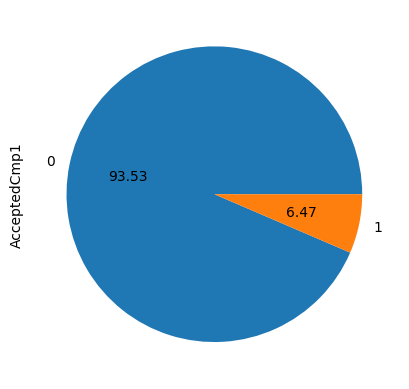

In [95]:
cust_data.AcceptedCmp1.value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='AcceptedCmp2'>

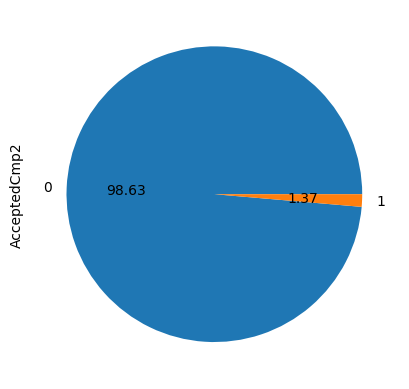

In [96]:
cust_data.AcceptedCmp2.value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='AcceptedCmp3'>

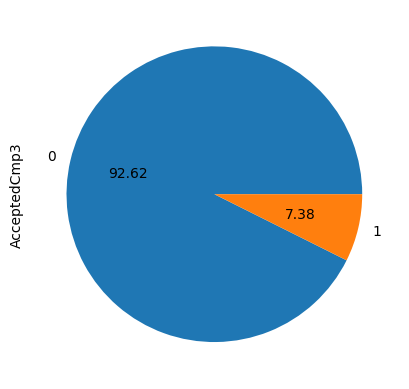

In [97]:
cust_data.AcceptedCmp3.value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='AcceptedCmp4'>

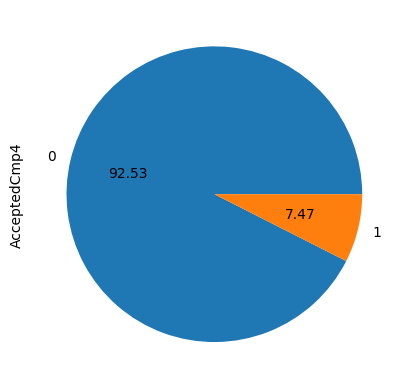

In [98]:
cust_data.AcceptedCmp4.value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='AcceptedCmp5'>

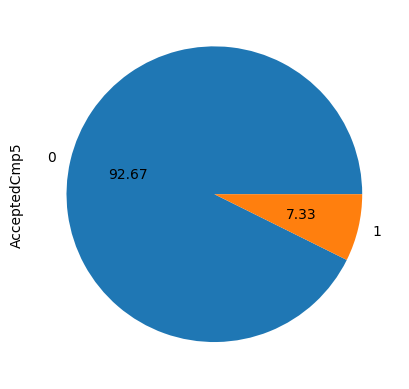

In [99]:
cust_data.AcceptedCmp5.value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Response'>

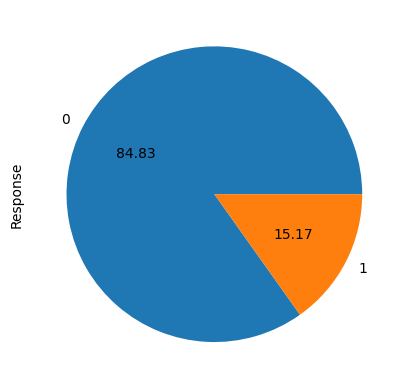

In [100]:
cust_data.Response.value_counts().plot(kind='pie',autopct='%.2f')

we can observe in last compaign customers accepted more than other compaigns.

<Axes: ylabel='TotalAcceptedCmp'>

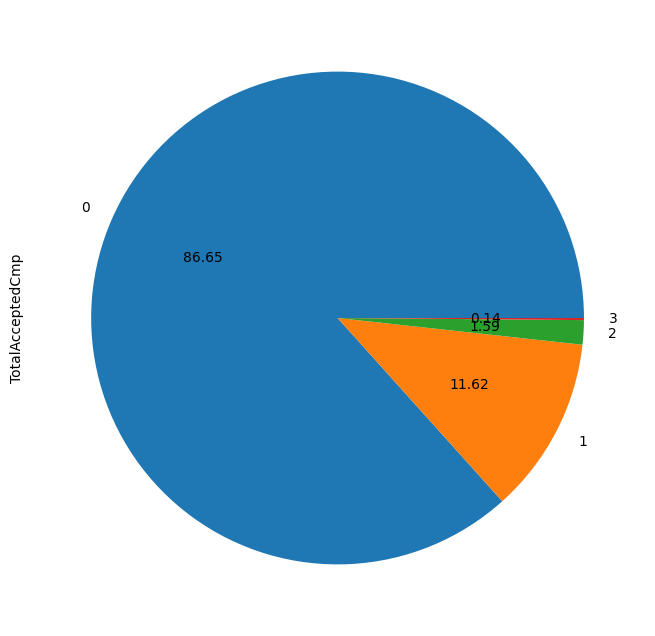

In [101]:
cust_data.TotalAcceptedCmp.value_counts().plot(kind='pie', figsize=(8,8),autopct='%.2f')

<Axes: ylabel='Complain'>

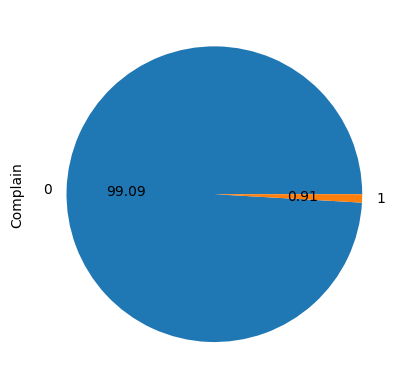

In [102]:
cust_data.Complain.value_counts().plot(kind='pie',autopct='%.2f')

We can see less tha 1 percentage of customers are complained.

In [103]:
cust_data.groupby(['Education','Children'])['MntTotalProducts'].sum()

Education        Children
Graduation       0           282469
                 1           221724
                 2            40383
                 3             5604
PostGraduation   0           247209
                 1           179739
                 2            38467
                 3             5395
UnderGraduation  0            42059
                 1            27421
                 2             4053
                 3              348
Name: MntTotalProducts, dtype: int64

<Axes: xlabel='Education,Children'>

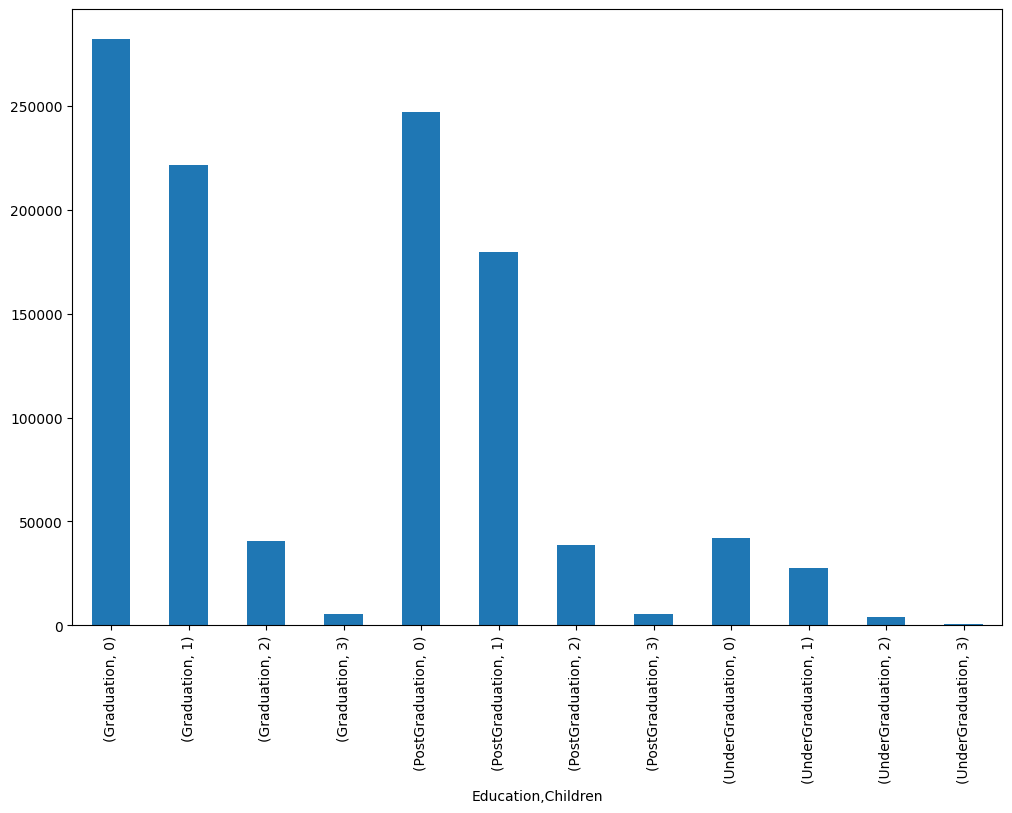

In [104]:
cust_data.groupby(['Education','Children'])['MntTotalProducts'].sum().plot(kind='bar',figsize=(12,8))

We can observe in above plot customers with no kids are spending more on products than having 1, 2 ,3 kids.  
Customers with graduation are spending more than post graduation customers.


<Axes: xlabel='Income_Grp,Education'>

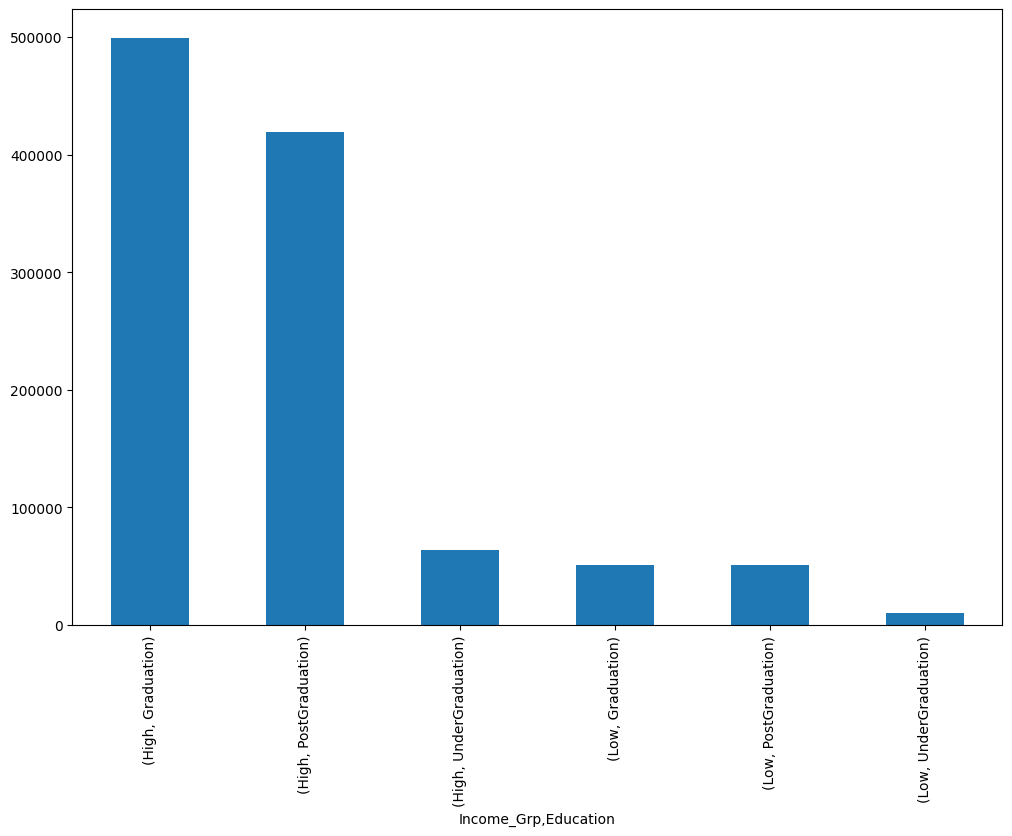

In [105]:
cust_data.groupby(['Income_Grp','Education'])['MntTotalProducts'].sum().plot(kind='bar',figsize=(12,8))

We can observe in above plot, Customers belongs to high income group are spending more amount than low income group and graduation customers are spending more than post graduation customers in high income group.

<Axes: xlabel='Income_Grp,Children'>

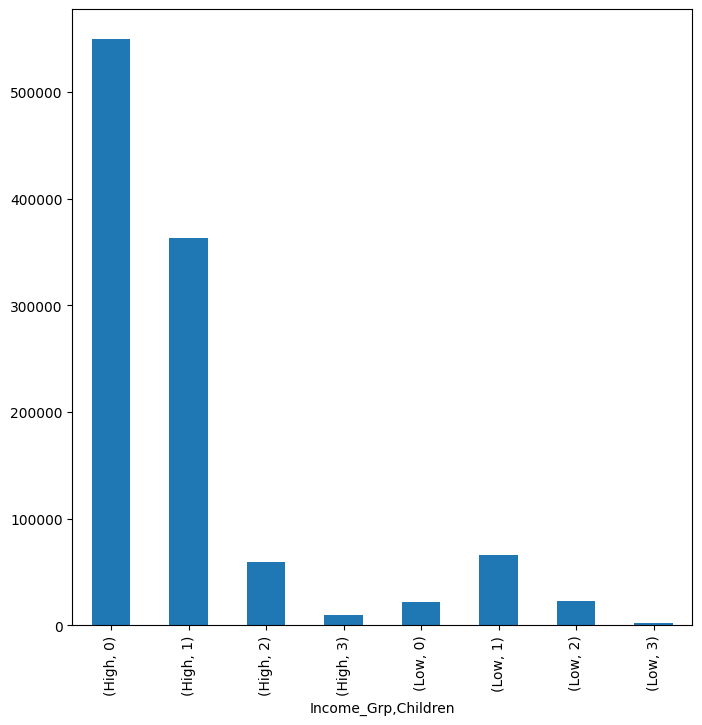

In [106]:
cust_data.groupby(['Income_Grp','Children'])['MntTotalProducts'].sum().plot(kind='bar',figsize=(8,8))

In high income group customers having no children are spending more then followed by 1 children customers spending more amount on products.
In low income group customers having 1 child are spending more than customers having no kids.

<Axes: xlabel='Income_Grp,CustomerAgeGrp'>

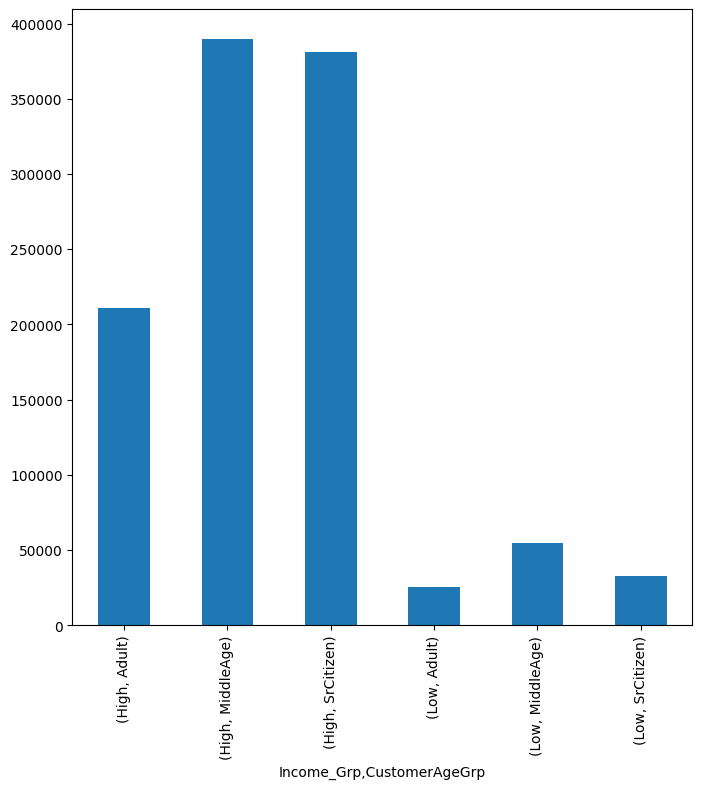

In [107]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['MntTotalProducts'].sum().plot(kind='bar',figsize=(8,8))

WE can observe in above bar plot, high income range with middle and senior citizens are spending more amount to purchase products.
Low income range people are not spending much.

<Axes: xlabel='Income_Grp,CustomerAgeGrp'>

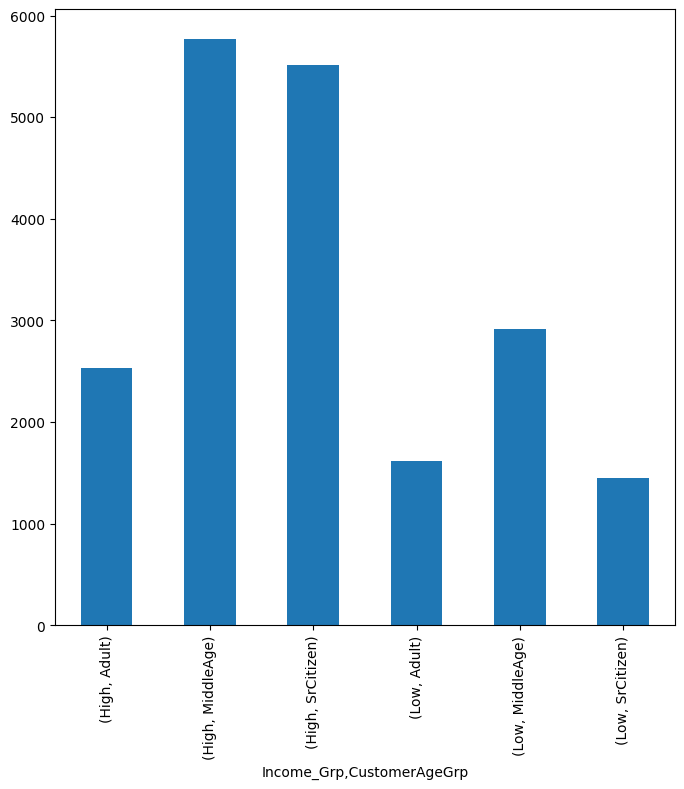

In [108]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['NumTotalPurchases'].sum().plot(kind='bar',figsize=(8,8))

In above plot, we can observe in High income group middleage followed by senior citizen customers purchasing more than Adult age customers.
In low income group middle age customers purchasing more comparative to Adult and senior citizen customers.

In [109]:
cust_data.groupby(['Education','Children'])['NumTotalPurchases'].sum()

Education        Children
Graduation       0           3227
                 1           5136
                 2           1598
                 3            133
PostGraduation   0           2467
                 1           3739
                 2           1413
                 3            212
UnderGraduation  0            697
                 1            936
                 2            206
                 3             26
Name: NumTotalPurchases, dtype: int64

<Axes: xlabel='Education,Children'>

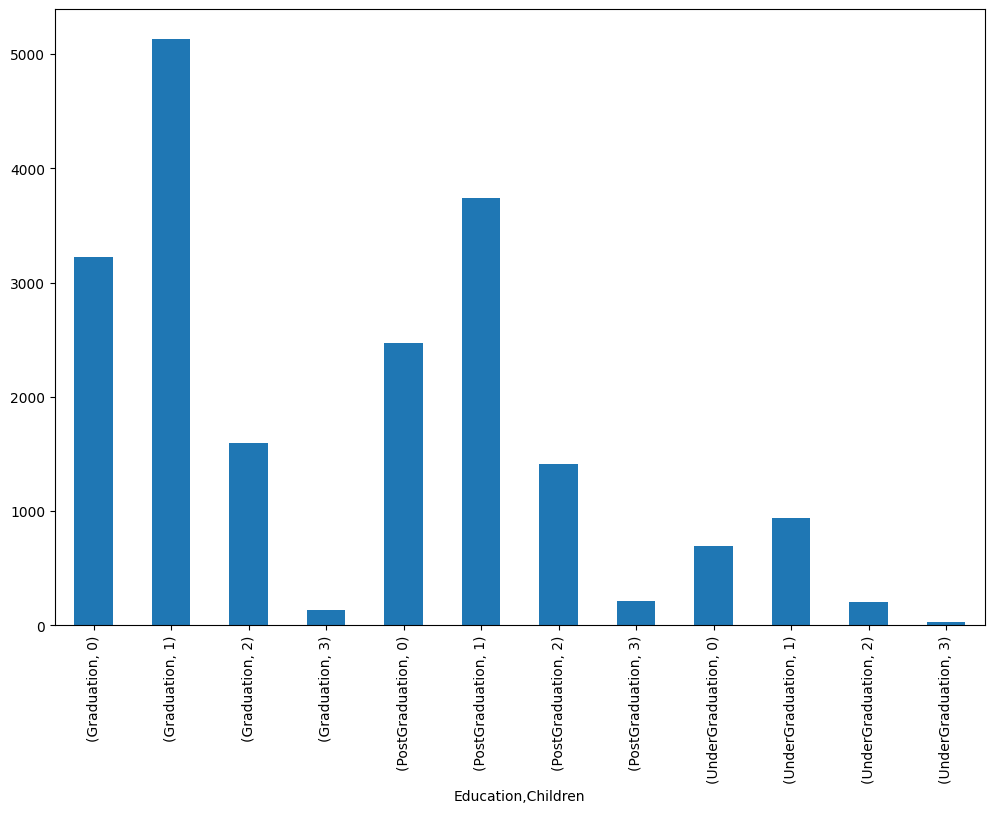

In [110]:
cust_data.groupby(['Education','Children'])['NumTotalPurchases'].sum().plot(kind='bar',figsize=(12,8))

Customers with graduation education purchasing more than Post graduation followed by under graduation customers.
Customers having 1 children purchasing more than no kids.
Customers having 3 children purchasing very less than others.

In [111]:
cust_data.groupby(['Education','Marital_Status'])['MntTotalProducts','NumTotalPurchases'].sum()

MntTotalProducts  NumTotalPurchases
Education       Marital_Status                                     
Graduation      Married                   351311               6471
                Single                    198869               3623
PostGraduation  Married                   299268               5071
                Single                    171542               2760
UnderGraduation Married                    43623               1232
                Single                     30258                633

<Axes: xlabel='Education,Marital_Status'>

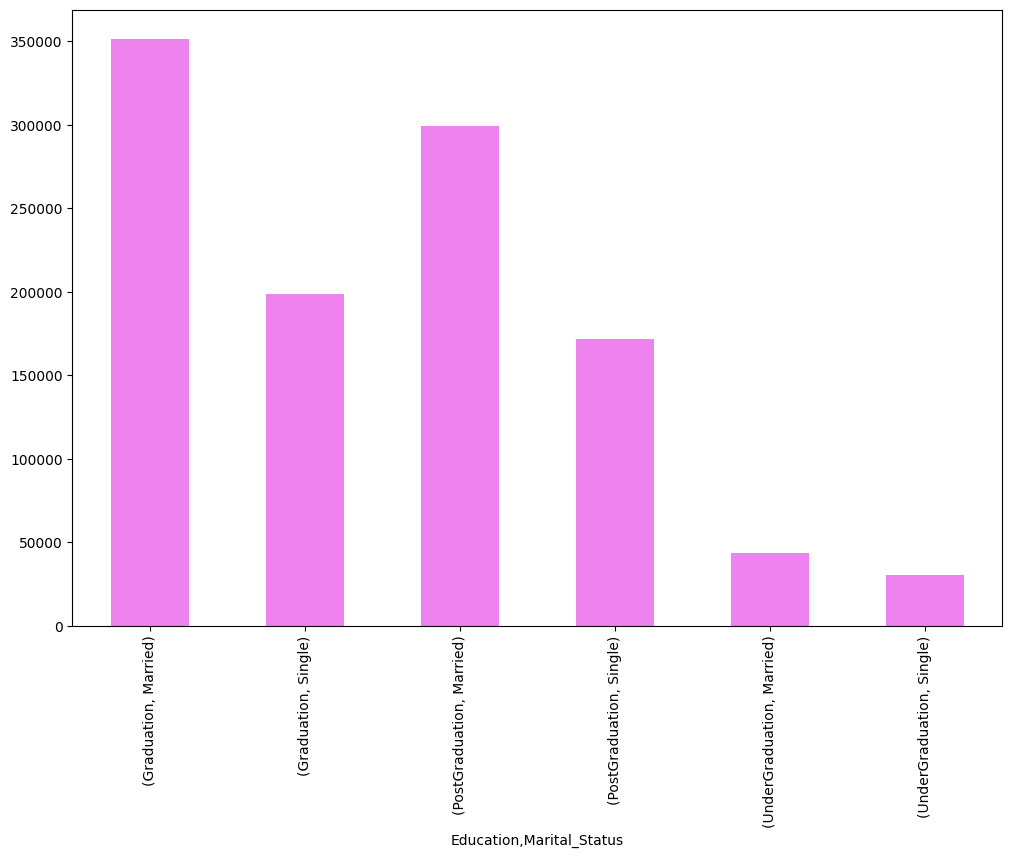

In [112]:
cust_data.groupby(['Education','Marital_Status'])['MntTotalProducts'].sum().plot(kind='bar', figsize=(12,8), color='violet')

Customers with married status are spending more amount than single status graduation customers and same we can observe in post graduation customers.

<Axes: xlabel='Education,Children'>

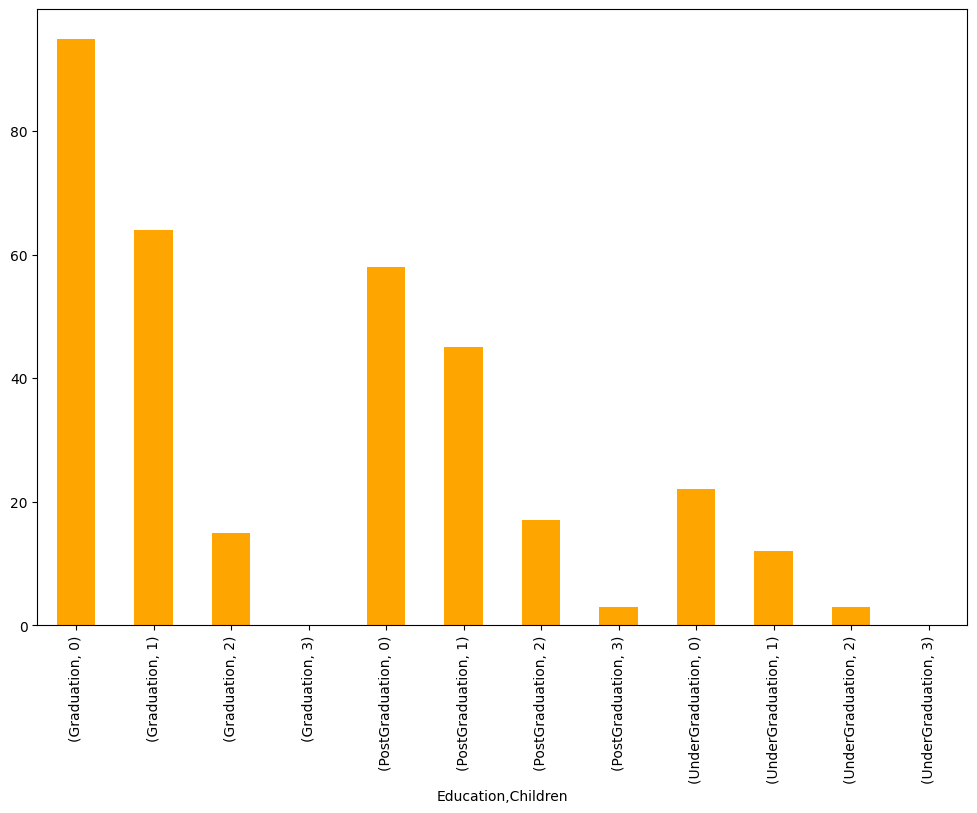

In [113]:
cust_data.groupby(['Education','Children'])['TotalAcceptedCmp'].sum().plot(kind='bar', figsize=(12,8), color='orange')

Graduated customers with no kids accepted compaigns more than customers having 1 kid followed by 2.

In [114]:
cust_data.groupby(['Education','Children'])['NumDealsPurchases','NumStorePurchases','NumCatalogPurchases','NumWebPurchases'].sum()

NumDealsPurchases  NumStorePurchases  \
Education       Children                                         
Graduation      0                       324               2322   
                1                      1418               3225   
                2                       721                878   
                3                        68                 91   
PostGraduation  0                       256               1761   
                1                       994               2428   
                2                       626                785   
                3                        97                 87   
UnderGraduation 0                        97                511   
                1                       315                605   
                2                       105                127   
                3                        15                 10   

                          NumCatalogPurchases  NumWebPurchases  
Education       Children                                        
Graduation      0                        1522             1381  
                1                        1239             2479  
                2                         216              661  
                3                          21               44  
PostGraduation  0                        1151             1060  
                1                         934             1811  
                2                         197              590  
                3                          27               88  
UnderGraduation 0                         283              317  
                1                         172              449  
                2                          33               68  
                3                           2                9

<Axes: xlabel='Education,Children'>

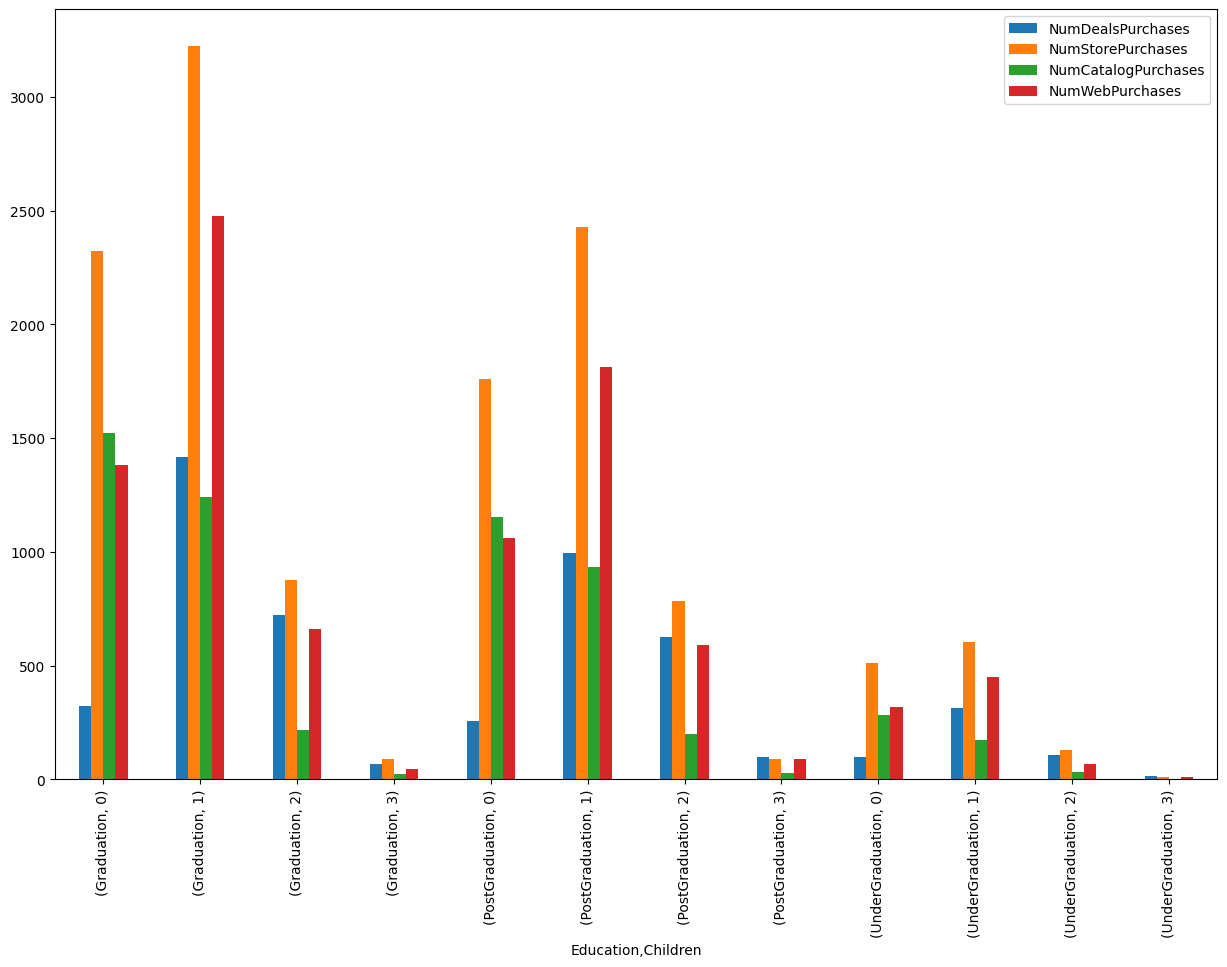

In [115]:
cust_data.groupby(['Education','Children'])['NumDealsPurchases','NumStorePurchases','NumCatalogPurchases','NumWebPurchases'].sum().plot(kind='bar',figsize=(15,10))

Graduated customers having 1 children are doing more purchases from store followed by web and we can observe same in post graduated customers with 1 children.
Customers having no children doing more purchases from store followed by catalog than web.

In [116]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['NumDealsPurchases','NumStorePurchases','NumCatalogPurchases','NumWebPurchases'].sum()

NumDealsPurchases  NumStorePurchases  \
Income_Grp CustomerAgeGrp                                         
High       Adult                         358               1844   
           MiddleAge                    1180               3685   
           SrCitizen                    1050               3581   
Low        Adult                         655               1080   
           MiddleAge                    1236               1766   
           SrCitizen                     557                874   

                           NumCatalogPurchases  NumWebPurchases  
Income_Grp CustomerAgeGrp                                        
High       Adult                          1044             1128  
           MiddleAge                      1943             2649  
           SrCitizen                      2010             2452  
Low        Adult                           178              780  
           MiddleAge                       382             1300  
           SrCitizen                       240              648

<Axes: xlabel='Income_Grp,CustomerAgeGrp'>

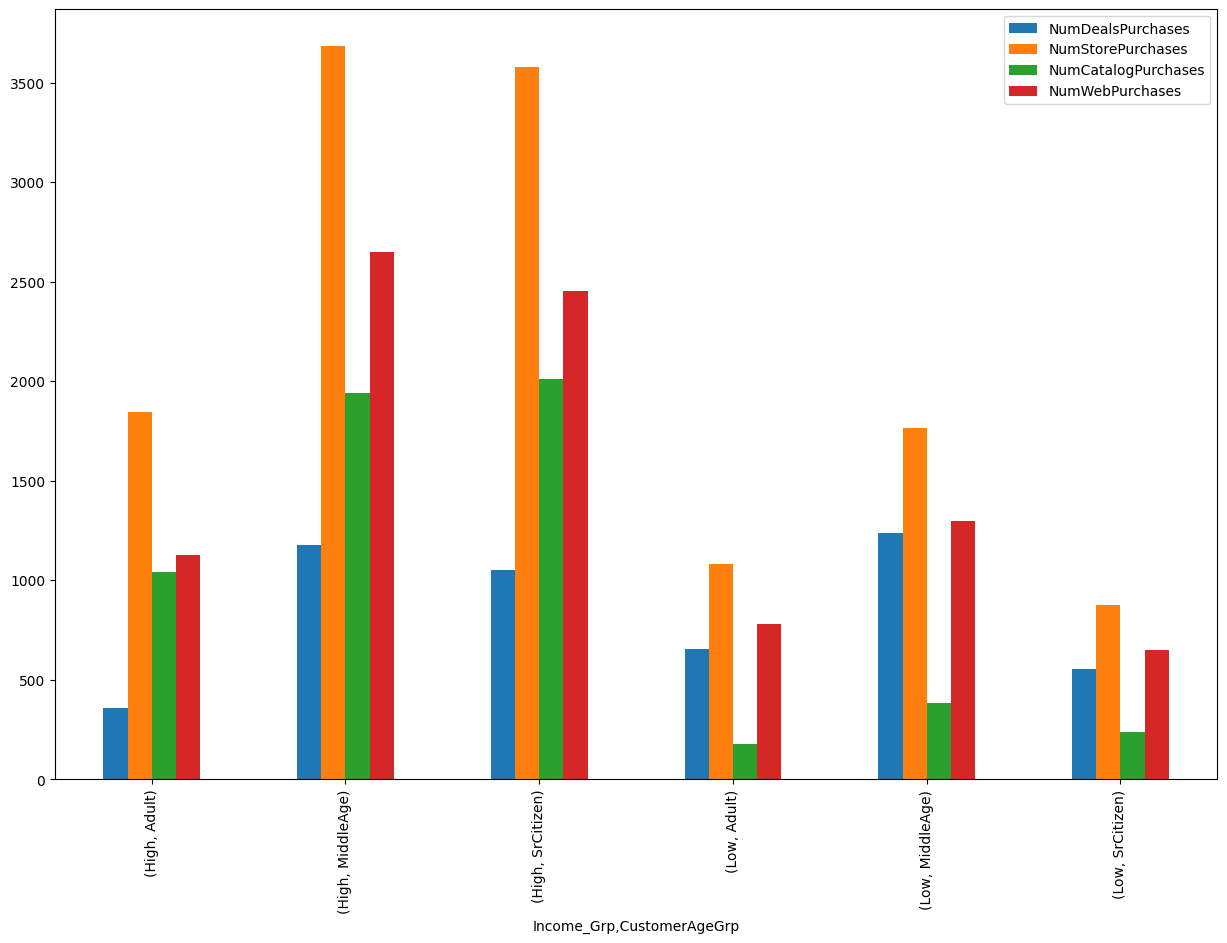

In [117]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['NumDealsPurchases','NumStorePurchases','NumCatalogPurchases','NumWebPurchases'].sum().plot(kind='bar',figsize=(15,10))

High income middle age followed by senior citizens then Adult cutomers are doing more purchases from store followed by web than catalog and lastly deals.
Low income Middle age followed by adult then senior citizens customers are doing more purchases from store followed by web than deals and lastly catalog.

In [118]:
cust_data.groupby(['Education','Children'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum()

MntWines  MntFruits  MntMeatProducts  \
Education       Children                                         
Graduation      0           142242      18699           121528   
                1           145010      13596            63118   
                2            27235       1890            11258   
                3             3522        217             1865   
PostGraduation  0           145437      11251            90521   
                1           137788       5001            36950   
                2            28617        991             8859   
                3             4387         76              932   
UnderGraduation 0            20377       2957            18725   
                1            16920       3120             7381   
                2             2567        336             1150   
                3              158          6              184   

                          MntFishProducts  MntSweetProducts  MntGoldProds  
Education       Children                                                   
Graduation      0                   27672             18575         23741  
                1                   18297             14235         26958  
                2                    2294              1877          5127  
                3                     168               207           398  
PostGraduation  0                   15578             10896         11867  
                1                    6974              5031         13253  
                2                    1658              1071          4132  
                3                      76                45           443  
UnderGraduation 0                    5116              3847          4816  
                1                    4642              3243          4681  
                2                     584               408           925  
                3                      24                 2            65

<Axes: xlabel='Education,Children'>

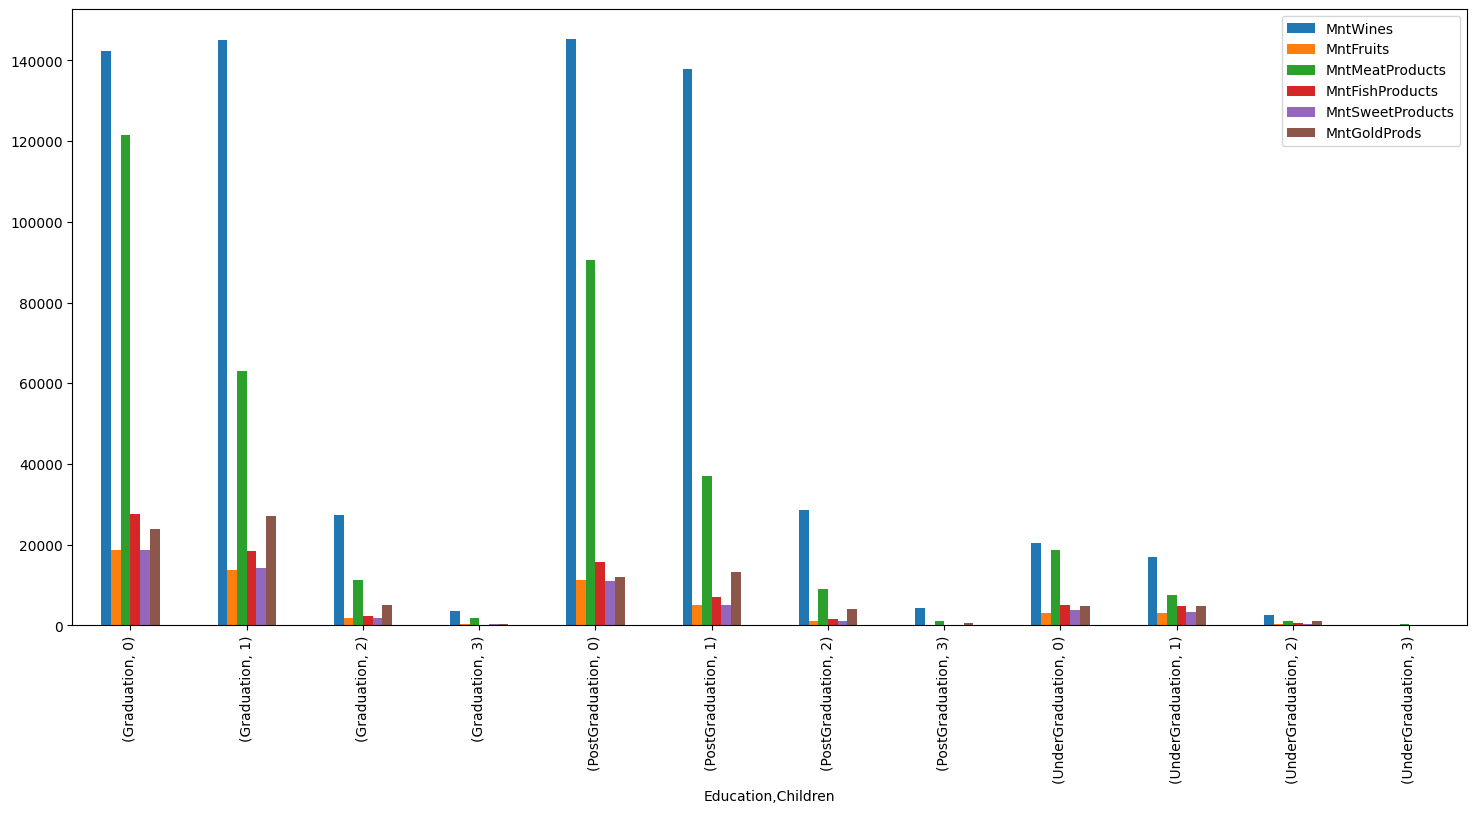

In [119]:
cust_data.groupby(['Education','Children'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum().plot(kind='bar',figsize=(18,8))

Customers having no children and 1 children are spending more amount on wine products followed by meat products are higher than other products.
Graduated customers having no children are spending more on meat products comparitive to others..

In [120]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum()

MntWines  MntFruits  MntMeatProducts  \
Income_Grp CustomerAgeGrp                                         
High       Adult             116691      12896            81468   
           MiddleAge         245814      19995           124180   
           SrCitizen         240377      18028           122502   
Low        Adult              12853       2423             9914   
           MiddleAge          36021       3344            15633   
           SrCitizen          22504       1454             8774   

                           MntFishProducts  MntSweetProducts  MntGoldProds  
Income_Grp CustomerAgeGrp                                                   
High       Adult                     17330             12699         15804  
           MiddleAge                 27563             20977         29570  
           SrCitizen                 26770             18366         28794  
Low        Adult                      3783              2643          7177  
           MiddleAge                  4675              2989         10117  
           SrCitizen                  2962              1763          4944

<Axes: xlabel='Income_Grp,CustomerAgeGrp'>

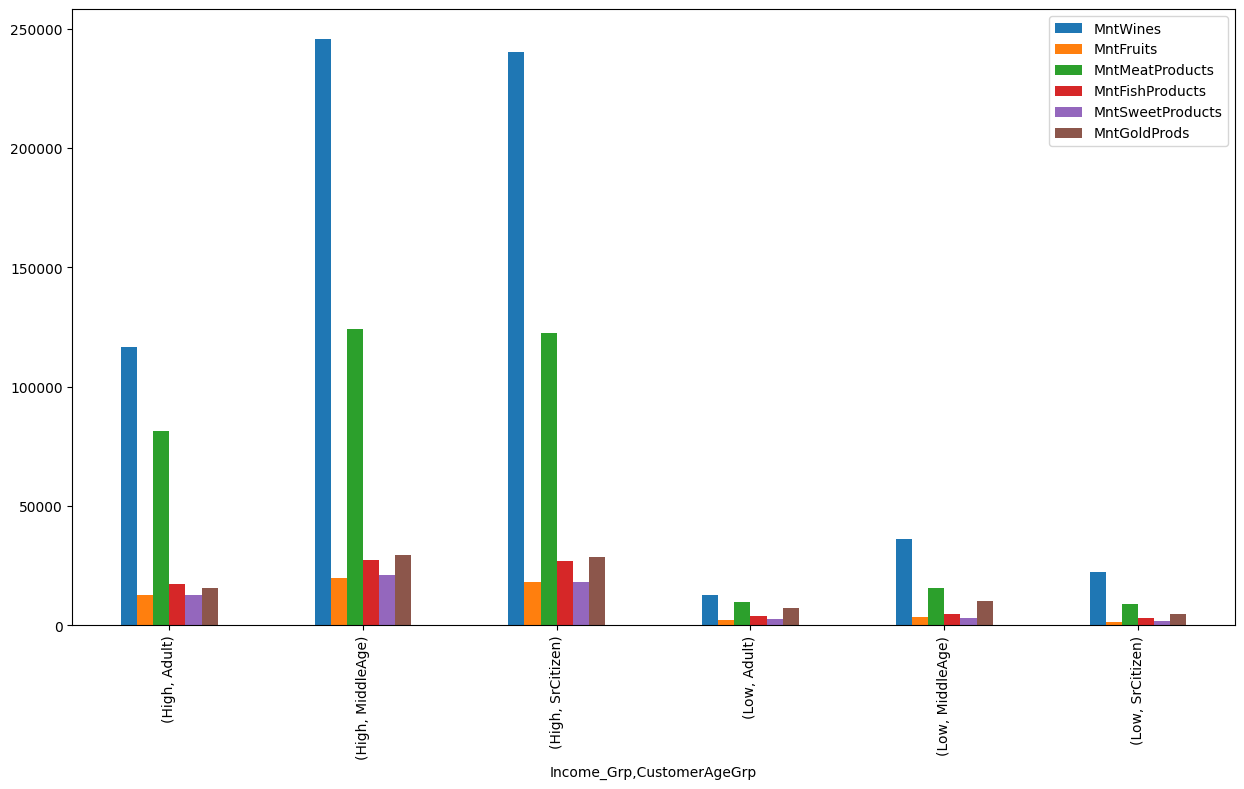

In [121]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum().plot(kind='bar',figsize=(15,8))

High income middle age and senior citizens are spending more on wine and meat products.

In [122]:
cust_data.groupby(['Education','Marital_Status'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum()

MntWines  MntFruits  MntMeatProducts  \
Education       Marital_Status                                         
Graduation      Married           206117      21075           124119   
                Single            111892      13327            73650   
PostGraduation  Married           202899      11046            85323   
                Single            113330       6273            51939   
UnderGraduation Married            23037       4239            16347   
                Single             16985       2180            11093   

                                MntFishProducts  MntSweetProducts  \
Education       Marital_Status                                      
Graduation      Married                   30775             22242   
                Single                    17656             12652   
PostGraduation  Married                   14293             10662   
                Single                     9993              6381   
UnderGraduation Married                    7417              4876   
                Single                     2949              2624   

                                MntGoldProds  
Education       Marital_Status                
Graduation      Married                35792  
                Single                 20432  
PostGraduation  Married                18039  
                Single                 11656  
UnderGraduation Married                 6946  
                Single                  3541

<Axes: xlabel='Education,Marital_Status'>

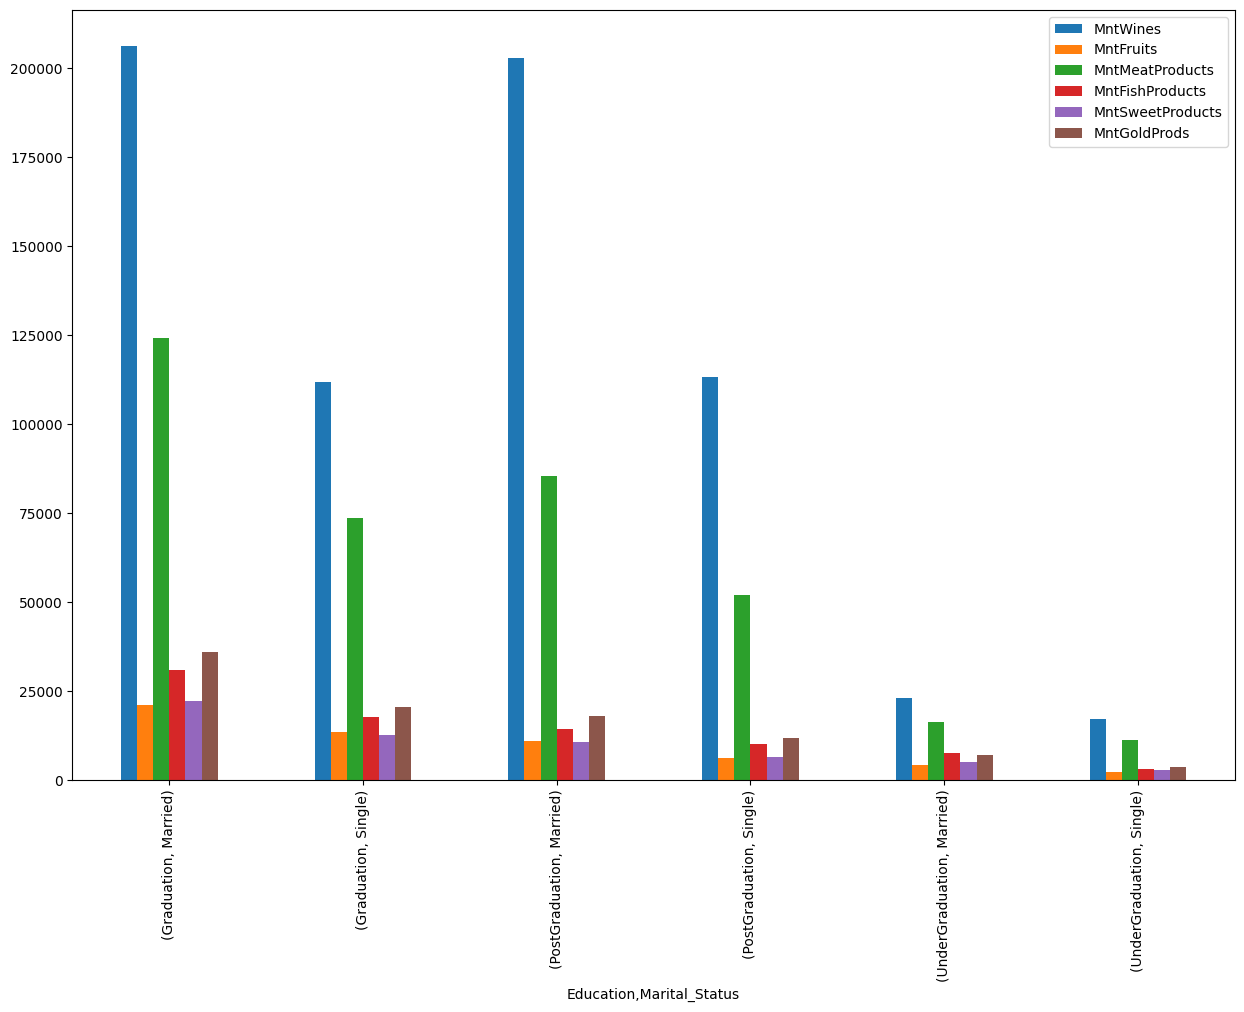

In [123]:
cust_data.groupby(['Education','Marital_Status'])['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum().plot(kind='bar',figsize=(15,10))

Graduated and post graduated married customers are spending more on wine and meat products than single customers

In [124]:
cust_data.groupby(['Education','Marital_Status'])['NumWebVisitsMonth'].sum()

Education        Marital_Status
Graduation       Married           3779
                 Single            2071
PostGraduation   Married           2790
                 Single            1573
UnderGraduation  Married            967
                 Single             480
Name: NumWebVisitsMonth, dtype: int64

<Axes: xlabel='Education,Marital_Status'>

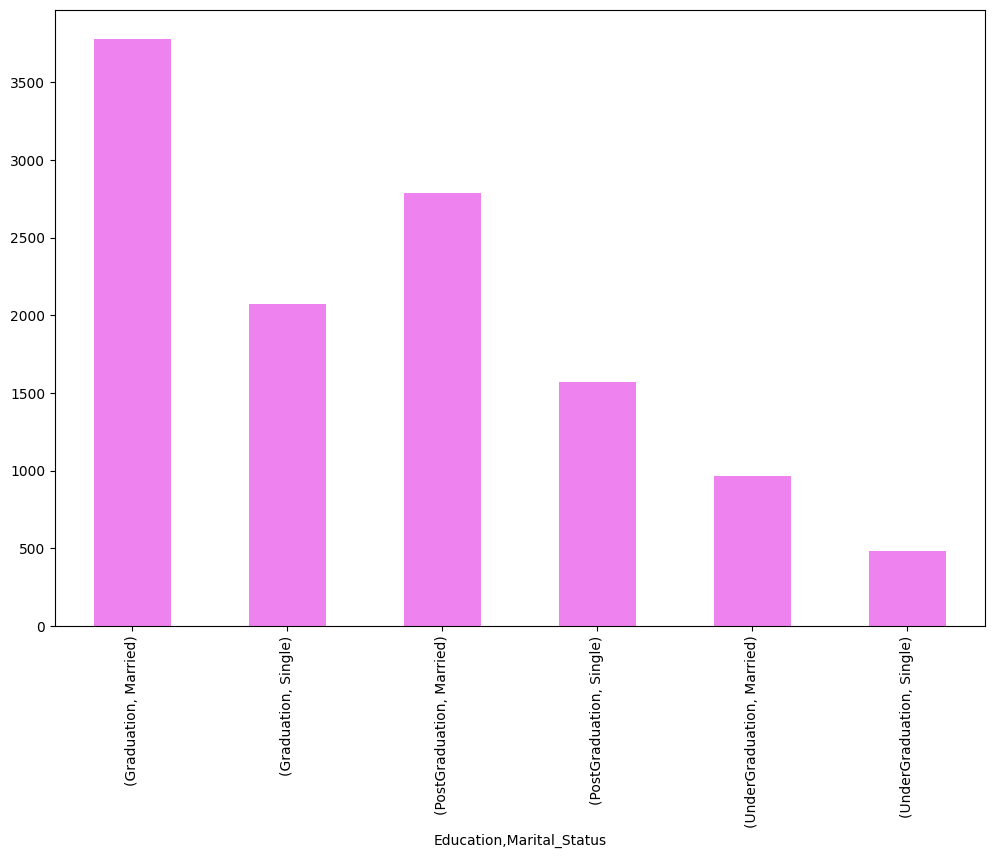

In [125]:
cust_data.groupby(['Education','Marital_Status'])['NumWebVisitsMonth'].sum().plot(kind='bar',figsize=(12,8), color='Violet')

Married customers are vising web more than single customers.

In [126]:
cust_data.groupby(['Education','Children'])['NumWebVisitsMonth'].sum()

Education        Children
Graduation       0           1064
                 1           3383
                 2           1261
                 3            142
PostGraduation   0            729
                 1           2366
                 2           1114
                 3            154
UnderGraduation  0            376
                 1            846
                 2            201
                 3             24
Name: NumWebVisitsMonth, dtype: int64

<Axes: xlabel='Education,Children'>

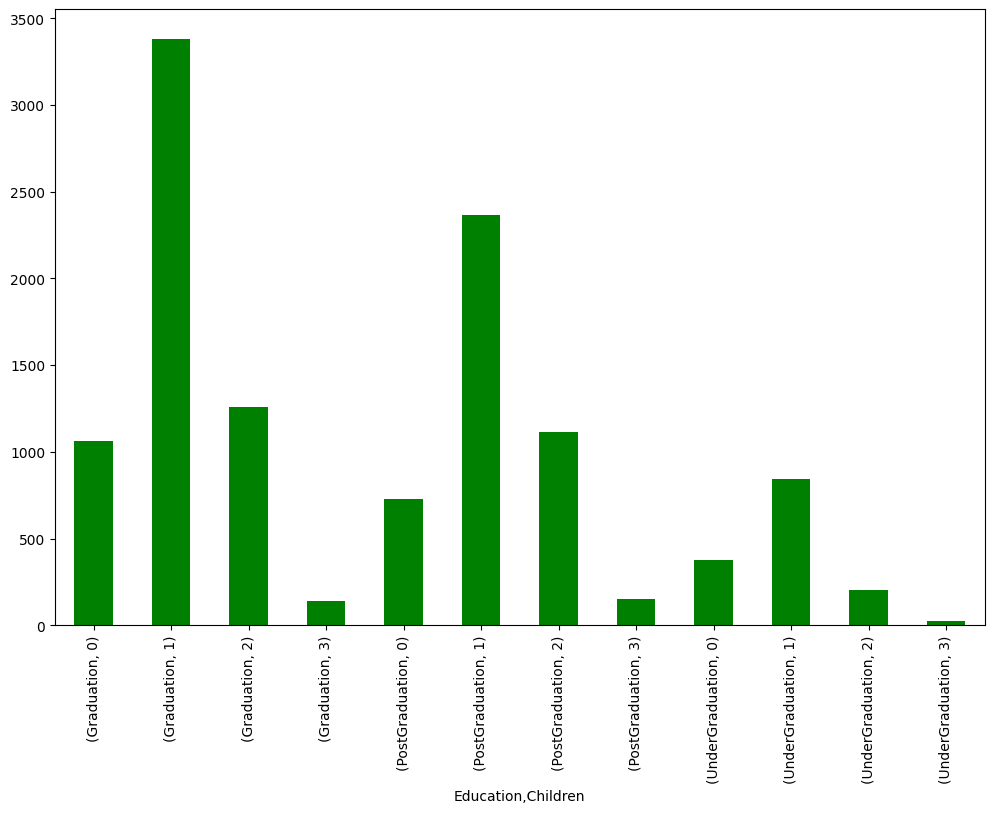

In [127]:
cust_data.groupby(['Education','Children'])['NumWebVisitsMonth'].sum().plot(kind='bar',figsize=(12,8), color='green')

customers having 1 children are visiting web more than other children.

<Axes: xlabel='Education,Children'>

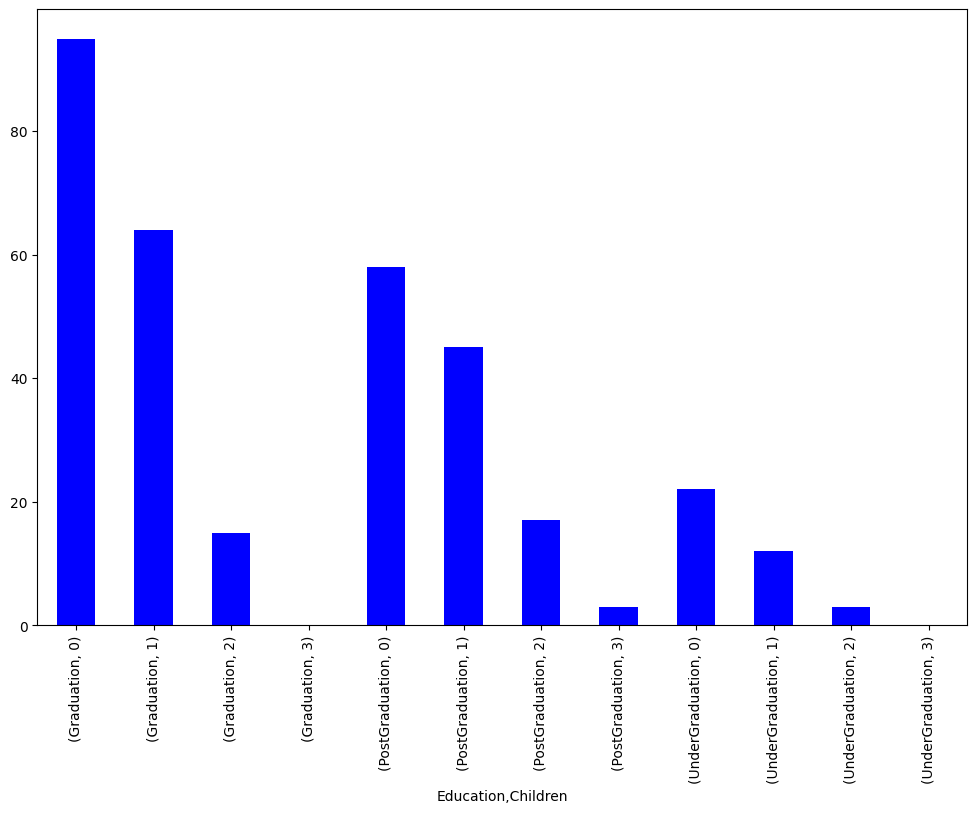

In [128]:
cust_data.groupby(['Education','Children'])['TotalAcceptedCmp'].sum().plot(kind='bar',figsize=(12,8), color='blue')

Graduate customers having no kids accepting more compaigns than having kids
and we can observe same in post graduated and under graduated customers.

<Axes: xlabel='Income_Grp,CustomerAgeGrp'>

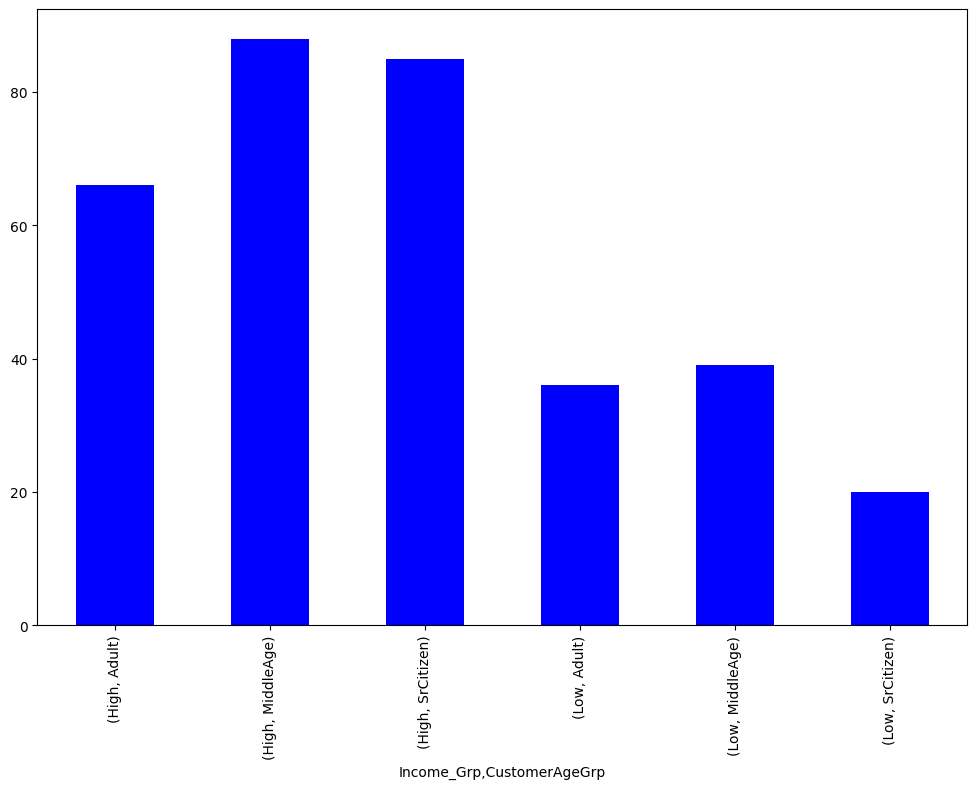

In [129]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['TotalAcceptedCmp'].sum().plot(kind='bar',figsize=(12,8), color='blue')

High income group middle age and senior citizens are accepting more compaigns than others.

<Axes: xlabel='Education,Children'>

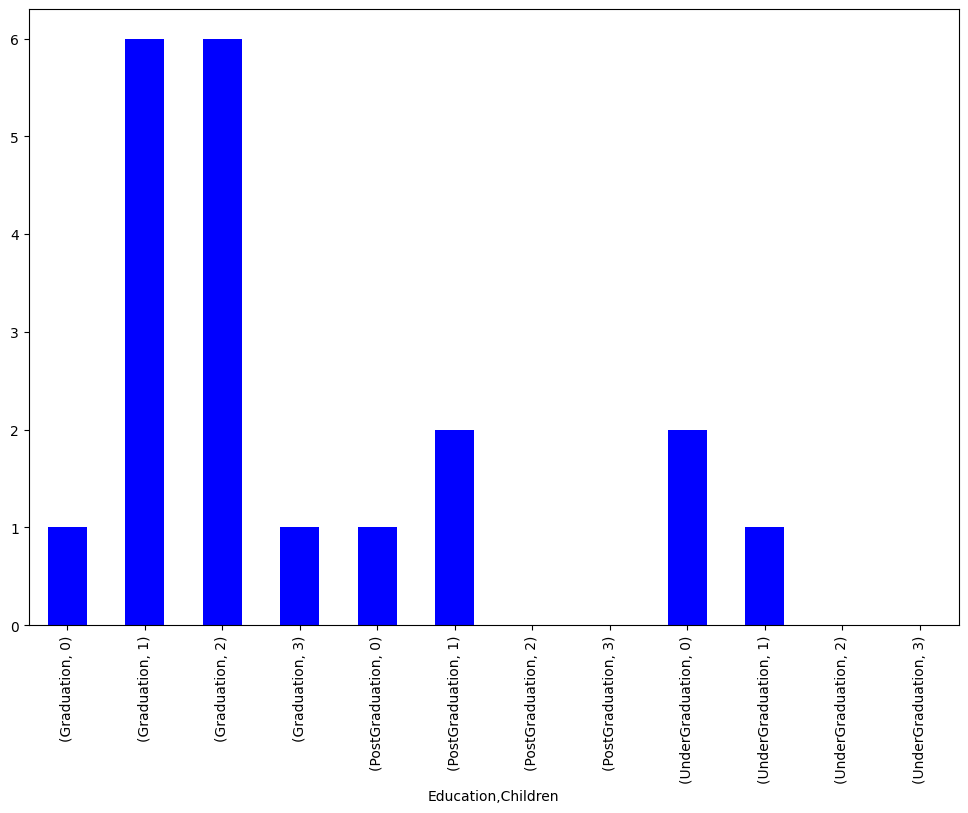

In [130]:
cust_data.groupby(['Education','Children'])['Complain'].sum().plot(kind='bar',figsize=(12,8), color='blue')

Graduate customers having children 1 and 2 are complain more than others.

<Axes: xlabel='Income_Grp,CustomerAgeGrp'>

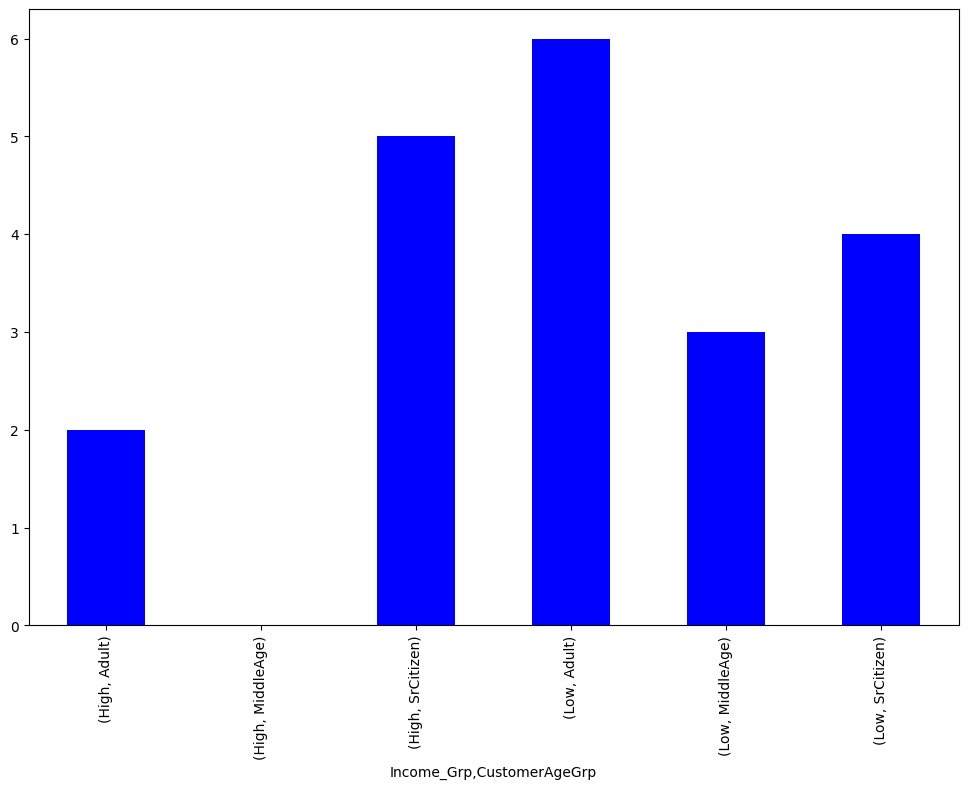

In [131]:
cust_data.groupby(['Income_Grp','CustomerAgeGrp'])['Complain'].sum().plot(kind='bar',figsize=(12,8), color='blue')

Low income group customers raising complaints more than high income group and in high income group senior citizens are raising complaints more than adults.
In low income group adults are raising more than senior citizens followed by middle age customers.

# Correlation

<Axes: >

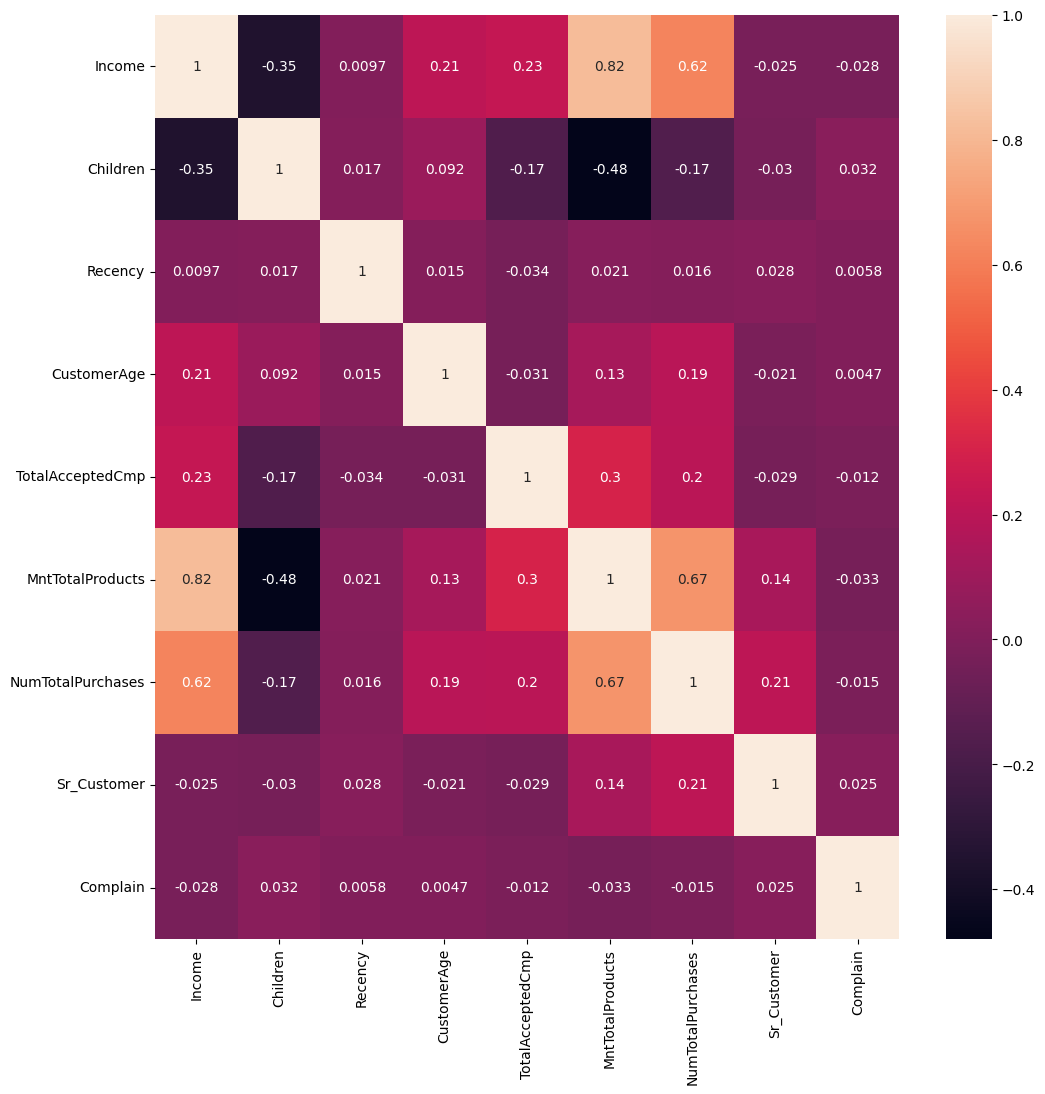

In [132]:
plt.figure(figsize=(12,12))
sns.heatmap(cust_data[['Income','Children','Recency','CustomerAge','TotalAcceptedCmp','MntTotalProducts','NumTotalPurchases','Sr_Customer','Complain']].corr(),annot=True)


We can observe Income feature is having strong correlation with amount spent on Totalproducts and number of Total purchases. and children have negative correlation with amount spent on Total Products

In [133]:
cust_data.to_csv("cust_data.csv")